# À vous !
Ces données portent sur les résultats des élèves de deux écoles portugaises dans l'enseignement secondaire. Les attributs des données comprennent les notes des élèves, les caractéristiques démographiques, sociales et scolaires)et elles ont été recueillies à l'aide de rapports scolaires et de questionnaires. Deux ensembles de données sont fournis concernant la performance dans deux sujets distincts : Mathématiques (mat) et portugais (por). 
- **school**: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- **sex**: student's sex (binary: 'F' - female or 'M' - male)
- **age**: student's age (numeric: from 15 to 22)
- **address**: student's home address type (binary: 'U' - urban or 'R' - rural)
- **famsize**: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- **Pstatus**: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- **Medu**: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- **Fedu**: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- **Mjob**: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **Fjob**: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **reason**: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- **guardian**: student's guardian (nominal: 'mother', 'father' or 'other')
- **traveltime**: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- **studytime**: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **failures**: number of past class failures (numeric: n if 1<=n<3, else 4)
- **schoolsup**: extra educational support (binary: yes or no)
- **famsup**: family educational support (binary: yes or no)
- **paid**: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- **activities**: extra-curricular activities (binary: yes or no)
- **nursery**: attended nursery school (binary: yes or no)
- **higher**: wants to take higher education (binary: yes or no)
- **internet**: Internet access at home (binary: yes or no)
- **romantic**: with a romantic relationship (binary: yes or no)
- **famrel**: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **freetime**: free time after school (numeric: from 1 - very low to 5 - very high)
- **goout**: going out with friends (numeric: from 1 - very low to 5 - very high)
- **Dalc**: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **Walc**: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **health**: current health status (numeric: from 1 - very bad to 5 - very good)
- **absences**: number of school absences (numeric: from 0 to 93)
- **G1**: first period grade (numeric: from 0 to 20)
- **G2**: second period grade (numeric: from 0 to 20)
- **G3**: final grade (numeric: from 0 to 20)

In [14]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

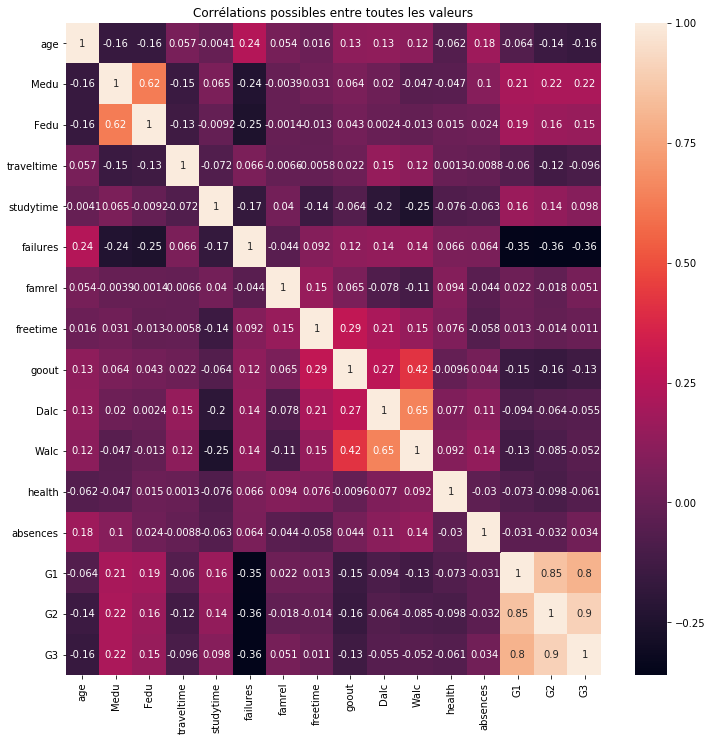

In [13]:
# Read data
data = pd.read_csv("./EDA/students.csv", index_col=0)

dimensions = (12, 12)
fig, ax = plt.subplots(figsize=dimensions)
plt.title("Corrélations possibles entre toutes les valeurs")
sns.heatmap(ax=ax, data=data.corr(), annot=True)

## Quelles sont les données en corrélation avec G3 ?

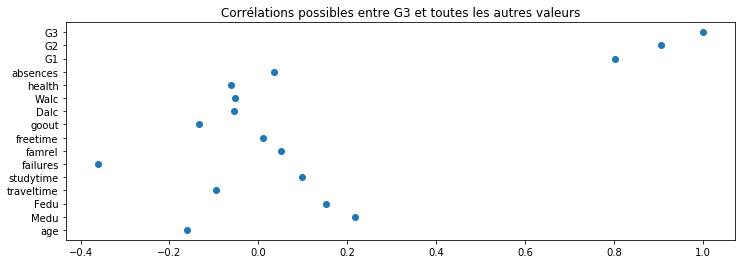

In [15]:
dimensions = (12, 4)
fig, ax = plt.subplots(figsize=dimensions)

listValues = data.corr()["G3"]

plt.title("Corrélations possibles entre G3 et toutes les autres valeurs")
plt.scatter(listValues, listValues.index)

### Observation
On remarque que les réussites en G1 et G2 sont très correlées avec celle en G3.<br/>On peut cependant se pencher sur quelques points à priori moins correlés.

## Quelle est le lien entre l'éducation des parents et la réussite de l'étudiant en G3 ?

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


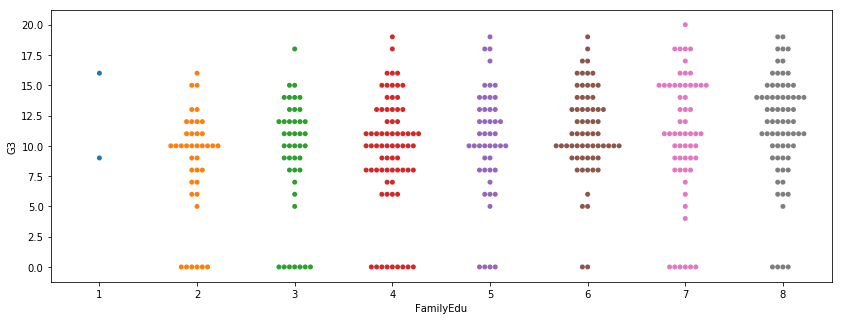

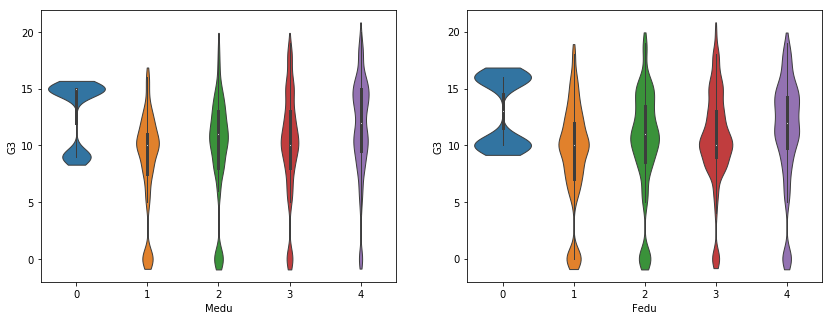

In [16]:
dimensions = (14, 5)

fig, ax = plt.subplots(figsize=dimensions)

listValues = data[["Medu", "Fedu", "G3"]]
listValues["FamilyEdu"] = listValues[["Fedu", "Medu"]].sum(axis=1)

ax = sns.swarmplot(x=listValues["FamilyEdu"], y=listValues['G3']) # Advantage is that we got dispersion (nb of effectif)

# plt.title("Corrélations possibles entre G3 et toutes les autres valeurs")
# ax.boxplot([listValues["Fedu"], listValues["Medu"]], labels=["Fedu", "Medu"], meanline=True)
# ax2.scatter(listValues["Fedu"], listValues["G3"], alpha=0.3)

fig, (ax2, ax3) = plt.subplots(1, 2, figsize=dimensions)
# ax2 = sns.barplot(x=["Medu", "Fedu"], y="G3", hue="Medu", data=listValues)
sns.violinplot(x="Medu", y="G3", data=listValues, ax=ax2, bw=.2, cut=1, linewidth=1)
sns.violinplot(x="Fedu", y="G3", data=listValues, ax=ax3, bw=.2, cut=1, linewidth=1)

### Observations

On a une légère augmentation dans les notes pour des étudiants dont les parents ont une longue formation.
<br/>On observe la dispertion des notes spécifiquement suivant l'éducation du père (à gauche) et de la mère (à droite), et on remarque qu'il n'y a pas particulièrement de différence dans la réussite des étudiants en G3.

## Un étudiant qui consomme de l'alcool en semaine a t'il moins de chances de réussite ?

### La semaine

[Text(0, 0.5, 'Note /20'), Text(0.5, 0, 'Nombre de verres en semaine')]

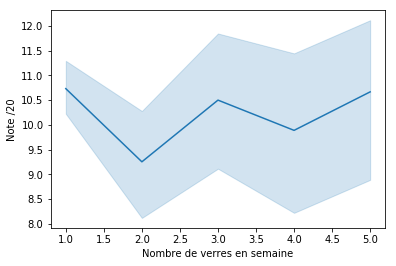

In [17]:
plot2 = sns.lineplot(x="Dalc", y="G3", data=data)
plot2.set(ylabel="Note /20", xlabel="Nombre de verres en semaine")

### Le week-end

[Text(0, 0.5, 'Nombre de verres le week-end'), Text(0.5, 0, 'Note sur 20')]

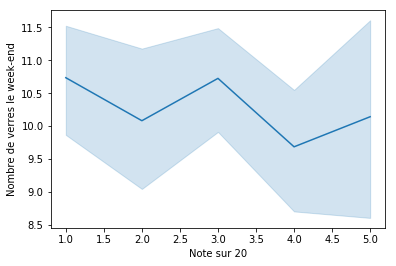

In [18]:
plot1 = sns.lineplot(x="Walc", y="G3", data=data)
plot1.set(ylabel="Nombre de verres le week-end", xlabel="Note sur 20")

### Observations
La consommation d\'alcool le week-end semble être plus néfaste que la consommation d'alcool en semaine. 

[Text(0, 0.5, 'Note /20'), Text(0.5, 0, 'Nombre de verres')]

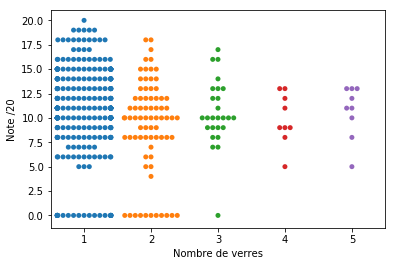

In [19]:
plot1 = sns.swarmplot(x="Dalc", y="G3", data=data)
plot1.set(ylabel="Note /20", xlabel="Nombre de verres")

[Text(0, 0.5, 'Note /20'), Text(0.5, 0, 'Nombre de verres ')]

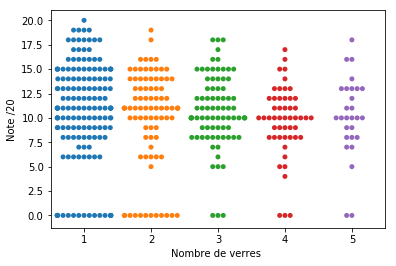

In [20]:
plot2 = sns.swarmplot(x="Walc", y="G3", data=data)
plot2.set(ylabel="Note /20", xlabel="Nombre de verres ")

### Observations

D'après les graphs ci-dessus, la répartition et les effectifs pour chaque fréquence de consommation d'alcool ne permettent pas de tirer de conclusion.

## Un étudiant ayant connu plus d'echec peut-il réussir son G3 ?

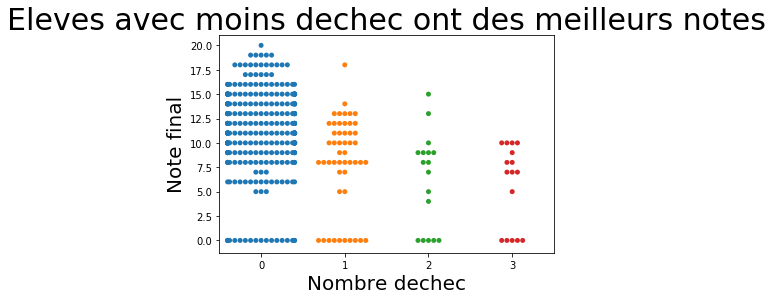

In [22]:
b = sns.swarmplot(x=data['failures'],y=data['G3'])
b.axes.set_title('Eleves avec moins dechec ont des meilleurs notes', fontsize = 30)
b.set_xlabel('Nombre dechec', fontsize = 20)
b.set_ylabel('Note final', fontsize = 20)
plt.show()

Les élèves ayant moins d'échecs antérieurs obtiennent habituellement de meilleurs résultats.

## Veulent aller en étude supérieur 

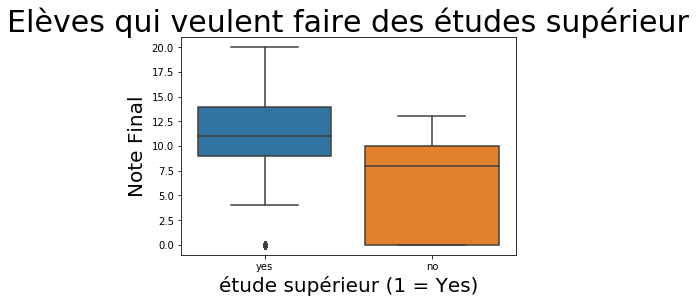

In [34]:
b = sns.boxplot(x = data["higher"], y=data['G3'])
b.axes.set_title('Elèves qui veulent faire des études supérieur', fontsize = 30)
b.set_xlabel('étude supérieur (1 = Yes)', fontsize = 20)
b.set_ylabel('Note Final', fontsize = 20)
plt.show()

Les élèves qui veulent faire des études supérieurs ont des meilleurs notes 

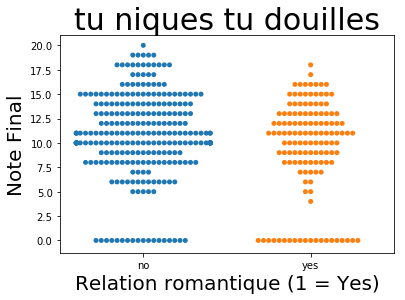

In [38]:
b = sns.swarmplot(x = data["romantic"], y=data['G3'])
b.axes.set_title('Relation roman', fontsize = 30)
b.set_xlabel('Relation romantique (1 = Yes)', fontsize = 20)
b.set_ylabel('Note Final', fontsize = 20)
plt.show()

Les élèves n'ayant pas de relation ont des meilleurs notes 

## Sortir avec les KHEYS

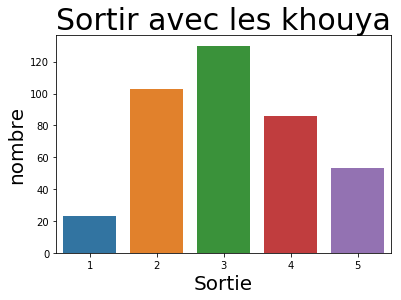

In [41]:
b = sns.countplot(data['goout'])
b.axes.set_title('Sortir avec les khouya', fontsize = 30)
b.set_xlabel('Sortie', fontsize = 20)
b.set_ylabel('nombre', fontsize = 20)
plt.show()

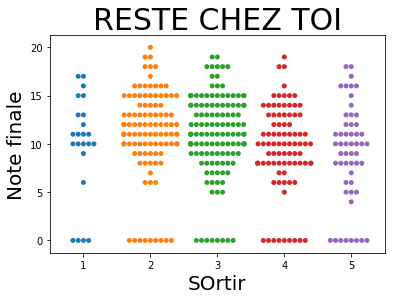

In [43]:
b = sns.swarmplot(x=data['goout'],y=data['G3'])
b.axes.set_title('RESTE CHEZ TOI', fontsize = 30)
b.set_xlabel('SOrtir', fontsize = 20)
b.set_ylabel('Note finale', fontsize = 20)
plt.show()

## Un étudiant qui a plus de temps libre réussi t'il mieux à l'école ?

[Text(0, 0.5, 'Note /20'), Text(0.5, 0, 'Nombre de verres')]

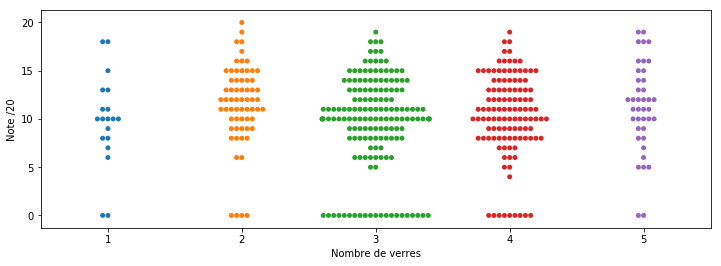

In [8]:
dimensions=(12, 4)
plt.figure(figsize=dimensions)

plot3 = sns.swarmplot(x="freetime", y="G3", data=data)
plot3.set(ylabel="Note /20", xlabel="Nombre de verres")

<Figure size 864x288 with 0 Axes>

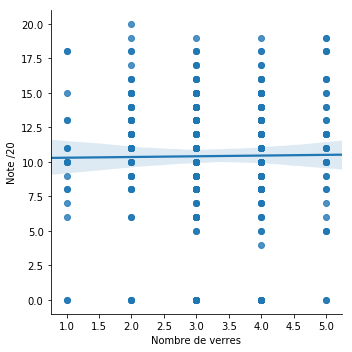

In [9]:
dimensions=(12, 4)
plt.figure(figsize=dimensions)

plot3 = sns.lmplot(x="freetime", y="G3", data=data)
plot3.set(ylabel="Note /20", xlabel="Nombre de verres")

### Observations
Le temps libre ne semble pas influer sur la réussite de l'élève. D'après les graphs ci-dessus, les notes sembles constantes. La régression linéaire ne semble pas montrer une réelle relation entre les notes et le temps libre.